# (Exploring Ford Bikeshare System)
## by (Ahmed ELSawy)

## Preliminary Wrangling

> We'll be wrangling and analyzing a dataset for the bikeshare system of Ford in America.

In [220]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [221]:
df = pd.read_csv('201902-fordgobike-tripdata.csv')
print('There are {} rows in the dataset and {} columns\n'.format(df.shape[0],df.shape[1]))
print('Columns in the dataset \n\n',list(df.columns))
print('\nBrief info about the dataset\n')
print(df.info())
df.head()

There are 183412 rows in the dataset and 16 columns

Columns in the dataset 

 ['duration_sec', 'start_time', 'end_time', 'start_station_id', 'start_station_name', 'start_station_latitude', 'start_station_longitude', 'end_station_id', 'end_station_name', 'end_station_latitude', 'end_station_longitude', 'bike_id', 'user_type', 'member_birth_year', 'member_gender', 'bike_share_for_all_trip']

Brief info about the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


## Fixing Quality issues

#### Converting Date columns to date types

In [222]:
#Using Pandas to_datetime feature to convert the data in the columns
for i in ['start_time','end_time']:
    df[i] = pd.to_datetime(df[i])

#### Converting the coordinates and ids columns to str

In [223]:
#Looping through the columns and converting the longitude and latitude columns to str
for col in df.columns:
    if col.split('_')[-1] in ['longitude','latitude','id']:
        df[col] = df[col].astype(str)

### Tiding the data to fit more for the analysis in mind

#### Extracting the hours in a separate column

In [224]:
df['hour'] = df.start_time.dt.hour

#### Extracting days in abbreviated names in a seperate column

In [225]:
df['day'] = df.start_time.dt.day_name().apply(lambda x: x[:3])
days = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
category = pd.api.types.CategoricalDtype(ordered = True,categories= days)
df.day = df.day.astype(category)

#### Converting the year of birth to age

In [226]:
#Importing floor to round down the age as we can't round up the age
from math import floor
#Acquiring the locations of the not null values
notna_years = df[df.member_birth_year.notna()]
#Applying the change to these places
df.loc[notna_years.index,'member_birth_year'] = notna_years.start_time.dt.year-df.loc[notna_years.index,'member_birth_year']
#Renaming the column to fit the new value more
df.rename(columns={'member_birth_year' : 'age'},inplace=True)

#### Adding a column with the duration in minutes

In [227]:
df['minutes'] = round(df.duration_sec/60)

### What is the structure of your dataset?

> The dataset consists of 183412 rows and 16 columns stored in a csv file provided by Ford describing the details of 183412 bike ride. Columns are (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude, end_station_longitude, bike_id, user_type, member_birth_year, member_gender, bike_share_for_all_trip).

### What is/are the main feature(s) of interest in your dataset?

> We'll be mainly focusing on the duration of the trip and how other factors could affect it.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Age, date, user type, and gender

## Univariate Exploration

> In this section, investigate distributions of individual variables. If
you see unusual points or outliers, take a deeper look to clean things up
and prepare yourself to look at relationships between variables.

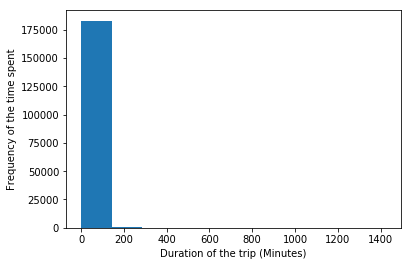

In [228]:
color_base = sb.color_palette()[0]
plt.hist(df.minutes);
plt.xlabel('Duration of the trip (Minutes)');
plt.ylabel('Frequency of the time spent');

It appears that almost all of the trips fall between only 3 hours and a very small amount extends to 5 hours. Let
s take a closer look at these numbers by incearsing the bins size

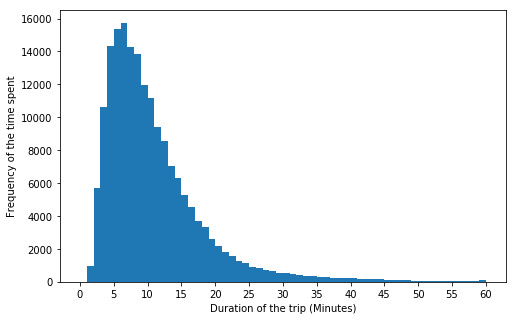

In [371]:
color_base = sb.color_palette()[0]
plt.figure(figsize=(8,5))
bins = np.arange(0,60+1,1)
ticks = np.arange(0,60+1,5)
plt.hist(df.minutes,bins = bins);
plt.xlabel('Duration of the trip (Minutes)');
plt.ylabel('Frequency of the time spent');
plt.xticks(ticks,ticks);

While there were trips which almost did last for 24 hrs. However, the vast majority lasts only around 10-15 minutes.

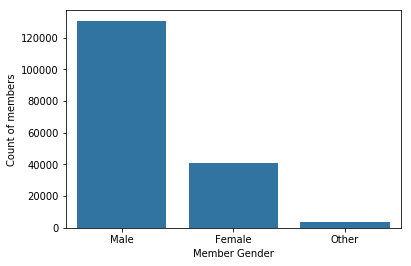

In [230]:
color_base = sb.color_palette()[0]
order = df.member_gender.value_counts().index
sb.countplot(data = df, x = 'member_gender',color=color_base,order=order);
plt.xlabel('Member Gender');
plt.ylabel('Count of members');

It appears to be that almost 3/4 of the members were males while the female count is approaching the remaining 1/4. However, there are a number of genders weren't specified.

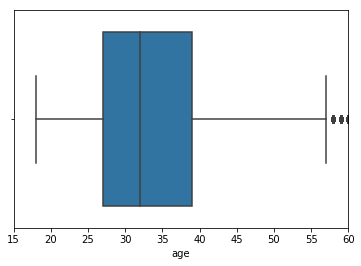

In [245]:
notnull_age = df[df.age.notna()].sort_values('age')
notnull_age.age = notnull_age.age.astype(int)
sb.boxplot(data = notnull_age, x = 'age',color=color_base);
plt.xlim(15,60);

As we can see the vast majority lyes between 25 and 40 years, comes 33 as the most frequent age and 28 right in the 2nd place.

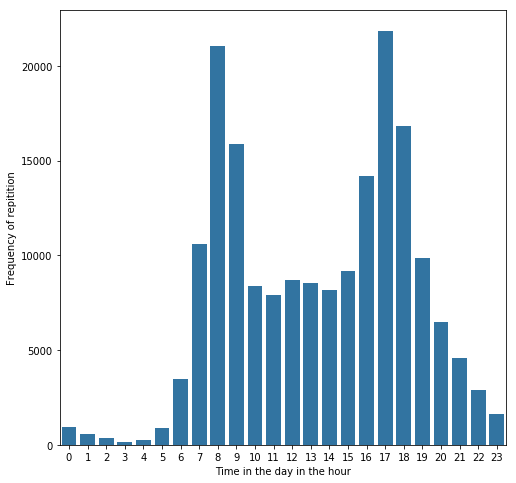

In [232]:
plt.figure(figsize=(8,8))
sb.countplot(data = df.sort_values('hour'),x='hour',color=color_base);
plt.xlabel('Time in the day in the hour')
plt.ylabel('Frequency of repitition');

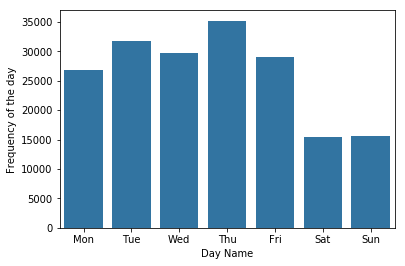

In [233]:
sb.countplot(data = df,x='day',color=color_base);
plt.xlabel('Day Name');
plt.ylabel('Frequency of the day');

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The distributions were definitely skewed always. The peak of the rides is around 8-9AM and 5-6PM. Also, it shows That the highest demands happen on Thursdays and Tuesdays while the trend showing the trip durations shows a tremendous increase within the first 15 minutes of the timeline which makes sense since the majority of the rides happen during the working days mostly.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The distributions were always skewed which led us to tap into the details further and discovered some insights mentioned in the previous point. Some changes were applied to fit the analysis more and to keep the data consistent, like changing the types of the columns and extracting the day and hour from the date column to help analyze more insights.

## Bivariate Exploration

> In this section, investigate relationships between pairs of variables in your
data. Make sure the variables that you cover here have been introduced in some
fashion in the previous section (univariate exploration).

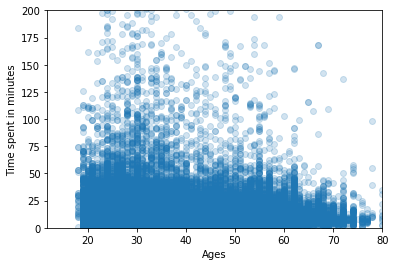

In [373]:
sb.regplot(data = notnull_age, x= 'age',y = 'minutes',fit_reg = False,scatter_kws={'alpha':1/5});
plt.ylim(0,200);
plt.xlabel('Ages');
plt.ylabel('Time spent in minutes');
ticks = np.arange(20,141,10)
plt.xticks(ticks,ticks);
plt.xlim(xmax=80);

It definitely shows that the peak of the time spent is between 20-30 which makes since while the curve patter gets lower by age increase

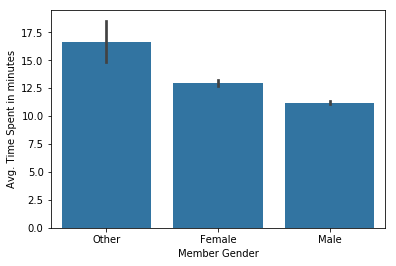

In [341]:
order = df.groupby('member_gender')['minutes'].mean().sort_values().index[::-1]
sb.barplot(data = df,x = 'member_gender', y = 'minutes', color = color_base, order=order);
plt.xlabel('Member Gender');
plt.ylabel('Avg. Time Spent in minutes');

It appears that people who signed their gender with other spends more time during the ride and Female comes in the 2nd place, leaving the males in the last place or rank. However, since the males are the highest number of users with a big difference between them and the other types, it's normally that the avg for the other types seems to be higher.

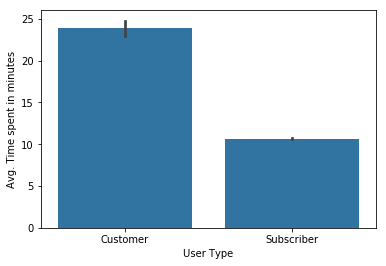

In [342]:
sb.barplot(data = df, x='user_type', y = 'minutes',color=color_base);
plt.xlabel('User Type');
plt.ylabel('Avg. Time spent in minutes');

The non-Subscribed people spends more time which makes sense since they're less a lot than the subscribers number which affects the avg.

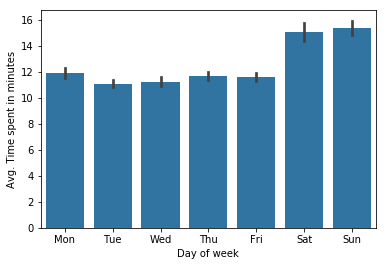

In [343]:
sb.barplot(data = df, x = 'day', y='minutes', color= color_base);
plt.xlabel('Day of week');
plt.ylabel('Avg. Time spent in minutes');

Regardless that Thursday is the highest demand day but the weekend days are the ones when customers spend most of their time which makes more sense because they have more spare time.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> Time in minutes showed a strong negative correlation with the age variable, specially in the age bracket of 25-40. 
> The correlation between the time and the gender and customer type was highly correlated. While it shows that the gender who spends more time during the ride is the gender signed as other. However, I believe this is due to having a high std level and different in the quantity of this type.
> As same as the above goes for the user type. The customers spend more time during than the subscribed.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> The other gender spends more time the all the other 2 genders, however, I believe this is due to having a high avg of spend time due to difference of quantity.

## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.

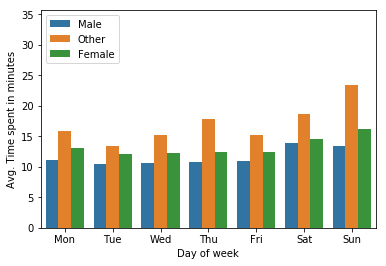

In [376]:
sb.barplot(data = df, x = 'day', y = 'minutes', hue = 'member_gender');
plt.legend(loc = ('upper left'));
plt.xlabel('Day of week');
plt.ylabel('Avg. Time spent in minutes');

The above shows that as noticed the other gender comes first in the time spent, female, then males. Also, the most time is spent during the weekend which makes more sense.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The multivariate exploration strengthened the fact that the other gender is spending more time in average more than the other genders as well as the days when the bikes get occupied for a longer time are the weekends but the days with more times of occupation are the weekdays, specially Thursday and Tuesday.

### Were there any interesting or surprising interactions between features?

> The results were a bit expected since we took a look on the intitial univariate explorations and bivariate explorations.